In [1]:
!git clone https://github.com/SiddheshKotwal/Predictive-Analytics-for-Corporate-Success-and-Growth.git

fatal: destination path 'Predictive-Analytics-for-Corporate-Success-and-Growth' already exists and is not an empty directory.


In [2]:
%cd  Predictive-Analytics-for-Corporate-Success-and-Growth

/content/Predictive-Analytics-for-Corporate-Success-and-Growth


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('/content/Predictive-Analytics-for-Corporate-Success-and-Growth/albert-inc-5000-2016-the-full-list/inc5000_2016.csv')
df.round(2)
df.head()

,id,rank,workers,company,url,state_l,state_s,city,growth,revenue,ifmid,ifiid,metro,industry,yrs_on_list
0,42940,1,218,Loot Crate,loot-crate,California,CA,Los Angeles,66788.5962,116247698,2.0,4,Los Angeles,Consumer Products & Services,1
1,42941,2,100,Paint Nite,paint-nite,Massachusetts,MA,Somerville,36555.2472,55018793,6.0,4,Boston,Consumer Products & Services,1
2,42942,3,47,CalCom Solar,calcom-solar,California,CA,Visalia,31633.5448,33507450,172.0,16,"Visalia-Porterville, CA",Energy,1
3,36643,4,82,eLuxurySupply.com,eluxurysupplycom,Indiana,IN,Evansville,23619.7198,30695215,641.0,18,"Evansville, IN-KY",Retail,2
4,36639,5,48,Company.com,companycom,Georgia,GA,Atlanta,23486.8894,33370967,29.0,17,Atlanta,Business Products & Services,2


In [5]:
df.describe(include='all')

,id,rank,workers,company,url,state_l,state_s,city,growth,revenue,ifmid,ifiid,metro,industry,yrs_on_list
count,5002.000000,5002.000000,5002.000000,5002,5002,5002,5002,5002,5002.000000,5.002000e+03,5001.000000,5002.000000,4965,5002,5002.000000
unique,NaN,NaN,NaN,5000,5001,52,52,1498,NaN,NaN,NaN,NaN,306,25,NaN
top,NaN,NaN,NaN,Client Command,client-command,California,CA,New York,NaN,NaN,NaN,NaN,New York City,IT Services,NaN
freq,NaN,NaN,NaN,2,2,667,667,179,NaN,NaN,NaN,NaN,400,687,NaN
mean,30453.439024,2500.383647,234.276090,NaN,NaN,NaN,NaN,NaN,434.991473,3.980988e+07,112.670466,10.807877,NaN,NaN,2.951220
std,12961.500588,1443.812924,1807.952931,NaN,NaN,NaN,NaN,NaN,1573.014183,1.481572e+08,250.111807,6.159228,NaN,NaN,2.178869
min,16.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,39.723700,1.622001e+06,1.000000,1.000000,NaN,NaN,1.000000
25%,22470.250000,1251.250000,25.000000,NaN,NaN,NaN,NaN,NaN,81.797625,4.892627e+06,8.000000,6.000000,NaN,NaN,1.000000
50%,36739.500000,2501.500000,50.000000,NaN,NaN,NaN,NaN,NaN,142.543150,1.036445e+07,22.000000,9.000000,NaN,NaN,2.000000
75%,43324.750000,3748.750000,126.000000,NaN,NaN,NaN,NaN,NaN,308.839425,2.766135e+07,67.000000,17.000000,NaN,NaN,4.000000


Removing Outliers from the dataset

In [6]:
for ind in df['industry'].unique():
    max_revenue = df[df['industry'] == ind]['revenue'].max()
    min_revenue = df[df['industry'] == ind]['revenue'].min()
    max_growth = df[df['industry'] == ind]['growth'].max()
    min_growth = df[df['industry'] == ind]['growth'].min()
    max_workers = df[df['industry'] == ind]['workers'].max()
    min_workers = df[df['industry'] == ind]['workers'].min()

    df = df[~((df['industry'] == ind) & ((df['revenue'] == max_revenue) | (df['revenue'] == min_revenue)))]
    df = df[~((df['industry'] == ind) & ((df['growth'] == max_growth) | (df['growth'] == min_growth)))]
    df = df[~((df['industry'] == ind) & ((df['workers'] == max_workers) | (df['workers'] == min_workers)))]

df.value_counts().sum()


4818

In [7]:
df_gr = df.groupby(['industry'])[['growth', 'revenue', 'workers']].mean().reset_index()

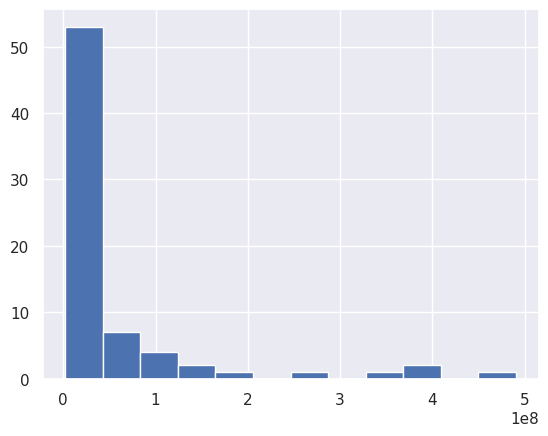

In [8]:
plt.hist(df[df['industry']=='Insurance']['revenue'], bins=12)
plt.show()


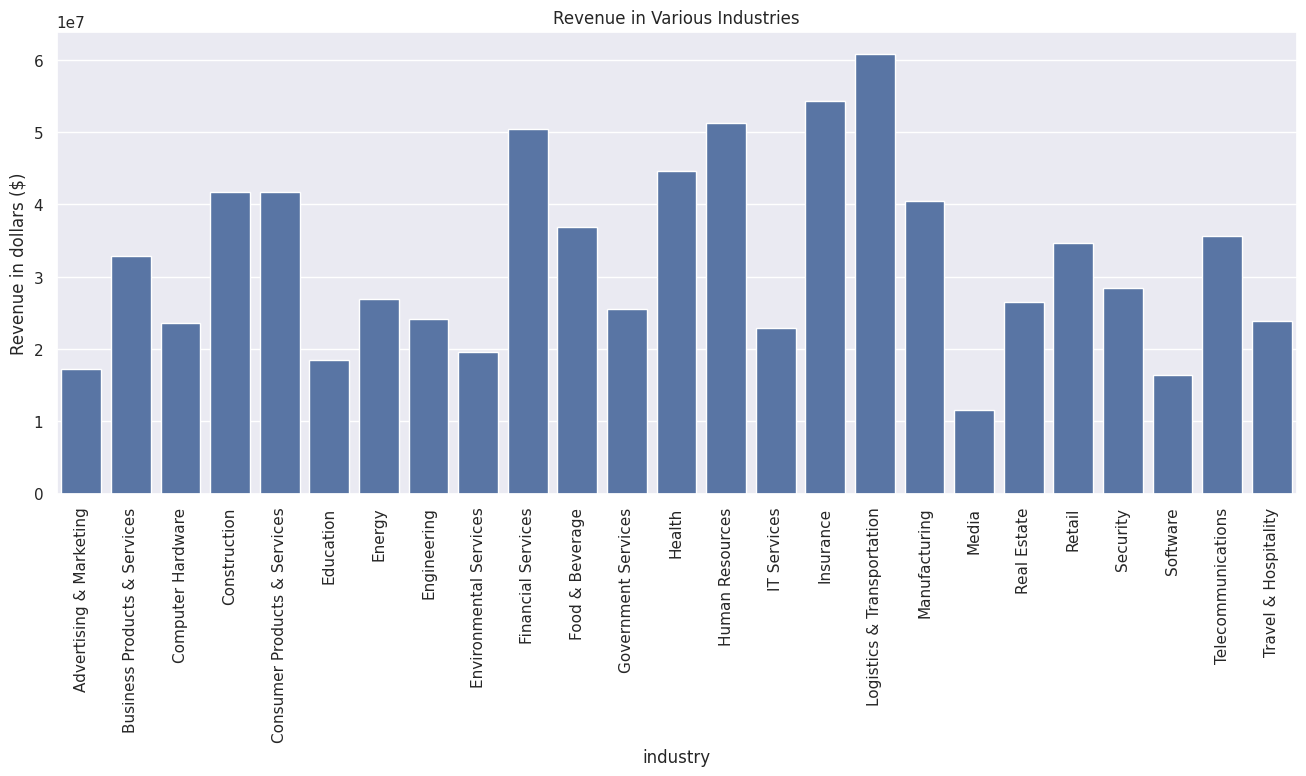

In [9]:
plt.figure(figsize=(16, 6))
sns.barplot(x='industry', y='revenue', data=df_gr)
plt.title('Revenue in Various Industries')
plt.ylabel('Revenue in dollars ($)')
plt.xticks(rotation=90)
plt.show()


### Revenue of the Companies working in respective industries, Companies can identify their industries and compare with these successful companies revenues in dollars and can identify their stance at present in terms of revenue. Here we can see Logistics & Transportation companies have highest revenues among all other industries. This revenue data and also every other info is on an average 2.5 years on list so it can be seen as consistent revenue/ info.

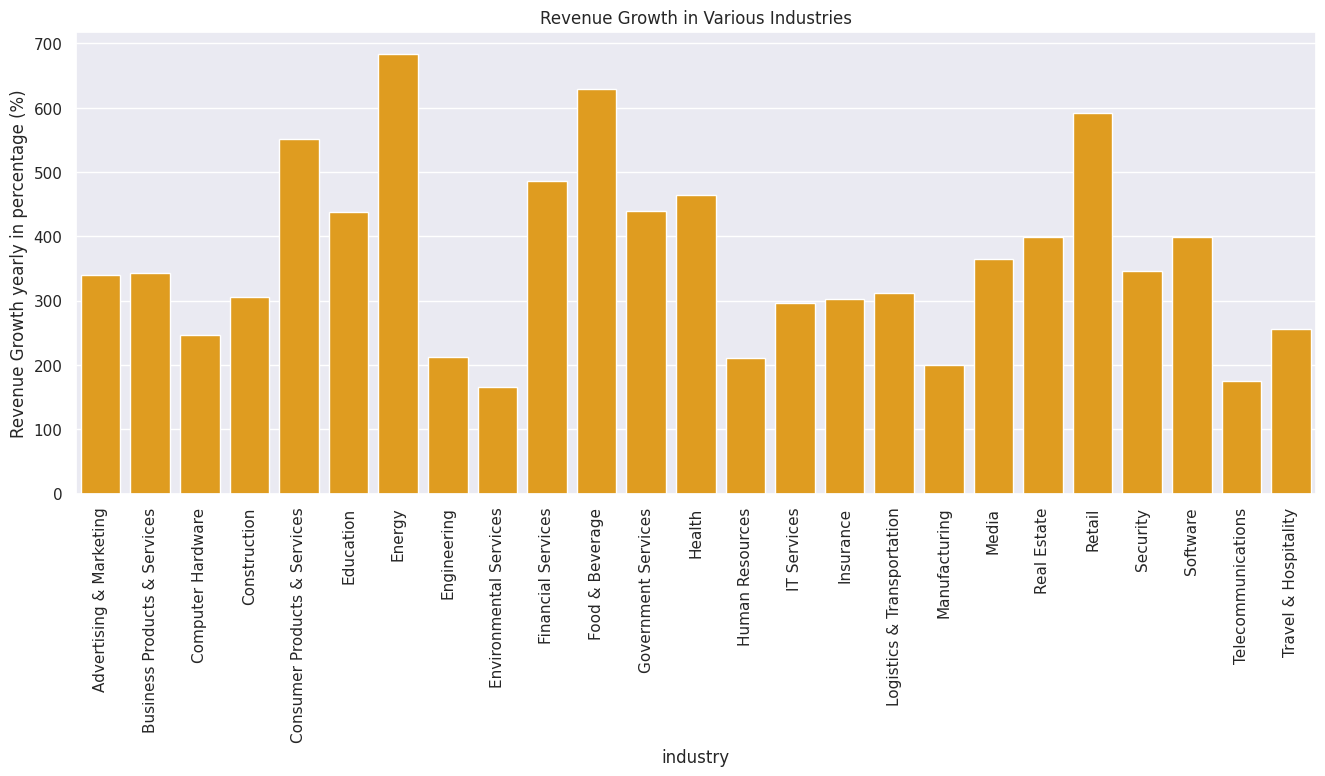

In [10]:
plt.figure(figsize=(16, 6))
sns.barplot(x='industry', y='growth', data=df_gr, color='orange')
plt.title('Revenue Growth in Various Industries')
plt.ylabel('Revenue Growth yearly in percentage (%)')
plt.xticks(rotation=90)
plt.show()


### Above bar graph represents the yearly revenue growth in percentage in specific industries of the successful companies in that respective industry by analysing these industries revenue growth rate we can identify our companies stance for the same.

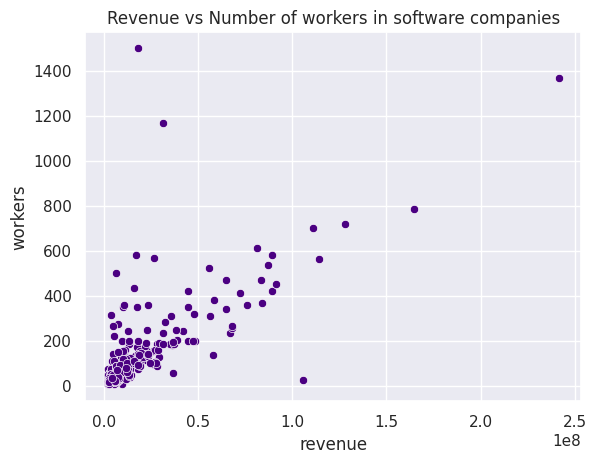

In [11]:
sns.scatterplot(y='workers', x='revenue', data=df[df['industry'] == 'Software'][['workers', 'revenue']], color='indigo')
plt.title('Revenue vs Number of workers in software companies')
plt.show()

### The above scatter plot shows the relation between the number of workers and revenue of companies across specific industry in this case software industry. We can see that there is linear relation between revenue of companies and number of workers in software industry.

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_software = df[df['industry'] == 'Software'][['workers', 'revenue']]

X = df_software['workers']
y = df_software['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     276.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           9.81e-43
Time:                        15:47:30   Log-Likelihood:                -4703.6
No. Observations:                 260   AIC:                             9411.
Df Residuals:                     258   BIC:                             9418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.679e+06    1.3e+06      3.611      0.0

### We can train a Regression Model to identify the revenue as per the number of employees in companies with respect to specific industry. So, that we can analyse current revenue and average revenue across respective industry. As the variables are statistically significant we can use this model for prediction explaining 50% variability.

In [13]:
model.predict([1, 300])

array([34017132.30271402])

This shows for company of software industry of 300 employees the average revenue should be around 34 Million dollars.

In [14]:
df_software.corr()

,workers,revenue
workers,1.000000,0.729681
revenue,0.729681,1.000000


Correlation between the no. of workers and revenue.

In [15]:
df_metro = df.groupby(['metro'])[['revenue', 'growth']].value_counts().reset_index()
df_counts = df_metro.groupby(['metro']).sum()
df_counts.drop(['revenue', 'growth'], axis=1, inplace=True)
df_counts.rename(columns = {0: 'no. of companies'}, inplace=True)
df_metro = df.groupby(['metro'])[['revenue', 'growth']].mean().reset_index()
df_metro = pd.merge(df_metro, df_counts, on='metro')
df_metro

,metro,revenue,growth,no. of companies
0,"Adrian, MI",2.848193e+07,330.274525,4
1,"Akron, OH",4.740436e+07,145.591537,8
2,"Albany-Schenectady-Troy, NY",2.022039e+07,555.588173,15
3,"Albertville, AL",9.575159e+06,1426.092000,1
4,"Albuquerque, NM",1.936476e+07,184.166429,7
...,...,...,...,...
293,"Wooster, OH",6.620677e+07,92.836100,1
294,"Worcester, MA-CT",8.440562e+07,281.335240,5
295,"Yakima, WA",5.925287e+06,433.972700,1
296,"York-Hanover, PA",2.668664e+07,70.906300,1


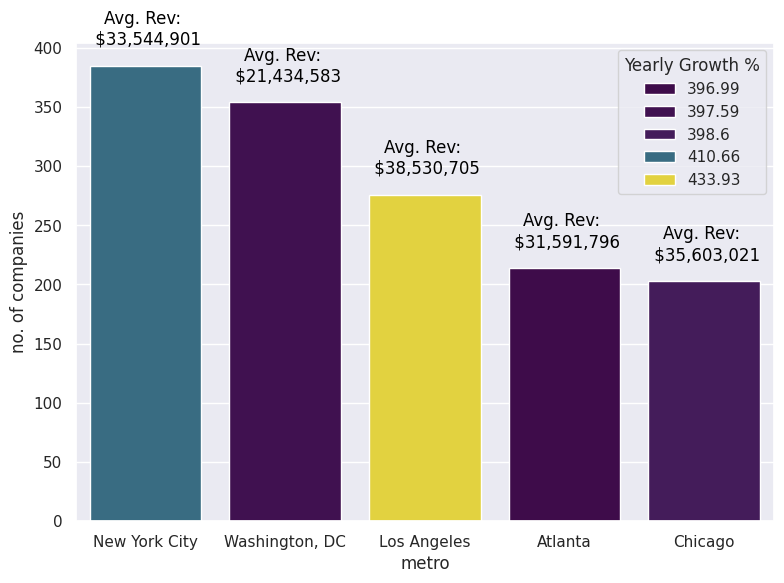

In [16]:
top_5 = df_metro.sort_values('no. of companies', ascending=False).head(5)
top_5['growth'] = top_5['growth'].round(2)
plt.figure(figsize=(8, 6))
ax = sns.barplot(y=top_5['no. of companies'], x=top_5['metro'], hue=top_5['growth'], dodge=False, palette='viridis', saturation=0.75)

# Add average revenue on top of each bar
for i, (index, row) in enumerate(top_5.iterrows()):
    avg_rev = row['revenue']
    avg_rev = int(avg_rev)
    avg_rev = f"{avg_rev:,}"
    ax.text(i, row['no. of companies'] + 0.1, f'Avg. Rev: \n ${avg_rev}\n', color='black', ha='center')

plt.legend(title='Yearly Growth %', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### These are the Top 5 metropolitan cities housing highest number of the companies and their revenues and yearly growth rate can be seen stating the importance of the location of the company, as most employees tend to work at best cities. Companies belongs to various industries.

In [17]:
industries = df['industry'].unique().tolist()
ind_metro_count = {}

for ind in industries:
    df_ = df[df['industry'] == ind].groupby(['metro'])['metro'].count().reset_index(name='no. of companies')
    df_max = df[df['industry'] == ind].groupby(['metro'])[['revenue', 'growth']].mean().reset_index()
    df_merged = pd.merge(df_max, df_, on='metro')
    top_3 = df_merged.nlargest(3, 'no. of companies').reset_index(drop=True)

    metro_info_list = []
    for _, row in top_3.iterrows():
        metro_info_list.append([row['metro'], row['no. of companies'], row['revenue'], row['growth']])

    ind_metro_count[ind] = metro_info_list


In [18]:
from ipywidgets import interact, widgets

def plot_industry(industry_name):
    metro_info = ind_metro_count.get(industry_name, [])
    if not metro_info:
        print(f"No information found for industry: {industry_name}")
        return

    metro_df = pd.DataFrame(metro_info, columns=['Metro', 'No. of Companies', 'Revenue', 'Growth'])
    metro_df['Growth'] = metro_df['Growth'].round(2)
    top_3 = metro_df.sort_values('No. of Companies', ascending=False).head(3)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top_3, x='Metro', y='No. of Companies', hue='Growth', dodge=False, palette='Blues', saturation=0.75)

    for i, (_, row) in enumerate(top_3.iterrows()):
        avg_rev = row['Revenue']
        avg_rev = int(avg_rev)
        avg_rev = f"{avg_rev:,}"
        ax.text(i, row['No. of Companies'] + 0.1, f'Avg. Rev: \n ${avg_rev}\n', color='black', ha='center')

    plt.title(f'{industry_name} - Top 3 Metros Overview', y=1.1)
    plt.legend(title='Yearly Growth %', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

industry_dropdown = widgets.Dropdown(
    options=list(ind_metro_count.keys()),
    value=list(ind_metro_count.keys())[0],
    description='Industry:',
)

interact(plot_industry, industry_name=industry_dropdown);


interactive(children=(Dropdown(description='Industry:', options=('Consumer Products & Services', 'Business Pro…

### From above dropdown menu we can choose the industry in which our company is working and find out the top 3 metropolitan cities where highest number of companies are working in respective industry and their average revenue and yearly growth rates can also be seen, this would be helpful to identify the companies operating at specific cities, where the workforce related to that industry might be more adaptable for that industry. Which can help us to locate better place for our company

In [19]:
df_coord = pd.read_csv('/content/Predictive-Analytics-for-Corporate-Success-and-Growth/albert-inc-5000-2016-the-full-list/metro_long_lat_coord.csv')
df_coord.rename(columns={'Location': 'metro'}, inplace=True)
df_comp_coord = pd.merge(df_coord, df, on='metro')
df_comp_coord['revenue'] = df_comp_coord['revenue'].apply(lambda x: '${:,.0f}'.format(x))
df_comp_coord['growth'] = df_comp_coord['growth'].apply(lambda x: '{:,.0f}%'.format(x))
df_comp_coord.head()

,metro,Longitude,Latitude,id,rank,workers,company,url,state_l,state_s,city,growth,revenue,ifmid,ifiid,industry,yrs_on_list
0,Atlanta,-84.3879,33.749,42955,19,35,Thrive Farmers,thrive-farmers,Georgia,GA,Roswell,"8,577%","$23,181,949",29.0,11,Food & Beverage,1
1,Atlanta,-84.3879,33.749,36634,42,302,Castle Medical,castle-medical,Georgia,GA,Smyrna,"5,882%","$49,053,588",29.0,10,Health,2
2,Atlanta,-84.3879,33.749,42976,44,15,MacStadium,macstadium,Georgia,GA,Atlanta,"5,341%","$5,890,205",29.0,8,IT Services,1
3,Atlanta,-84.3879,33.749,26462,98,28,CATMEDIA,catmedia,Georgia,GA,Tucker,"3,323%","$17,449,757",29.0,7,Government Services,3
4,Atlanta,-84.3879,33.749,43021,99,42,ArrowCore Group,arrowcore-group,Georgia,GA,Roswell,"3,307%","$4,753,417",29.0,8,IT Services,1


In [20]:
import folium

def plot_companies_by_industry(industry):
    filtered_companies = df_comp_coord[df_comp_coord['industry'] == industry]

    map_center = [filtered_companies.iloc[0]['Latitude'], filtered_companies.iloc[0][' Longitude']]
    my_map = folium.Map(location=map_center, zoom_start=5)

    for index, company in filtered_companies.iterrows():
        popup_content = f"""<strong>{company['company']}</strong><br>
                            Industry: {company['industry']}<br>
                            Revenue: {company['revenue']}<br>
                            Number of Workers: {company['workers']}<br>
                            Growth: {company['growth']}<br>
                            Rank: {company['rank']}<br>
                            Metro: {company['metro']}<br>
                            Years on List: {company['yrs_on_list']}"""

        folium.Marker(
            location=[company['Latitude'], company[' Longitude']],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(my_map)

    return my_map

# Change the industry to see the geographical location of companies related to respective industry
selected_industry = 'IT Services'
plot_companies_by_industry(selected_industry)


### Choose the Industry in the above code cell and see the geographical locations of the companies related to that respective industry with their details in the popup click on it to see the details.

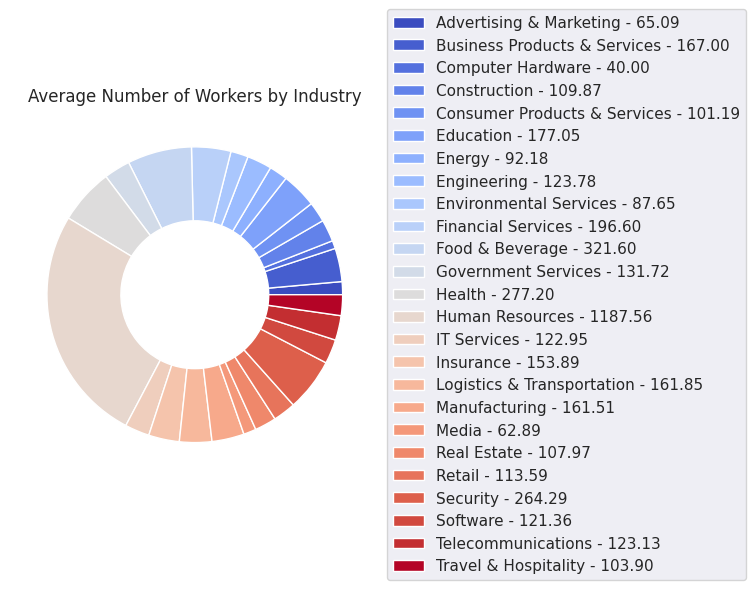

In [21]:
df_workers = df.groupby(['industry'])['workers'].mean().reset_index()
fig, ax = plt.subplots()

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_workers))]
wedges, texts = ax.pie(df_workers['workers'], colors=colors, wedgeprops=dict(width=0.5))

labels = [f'{industry} - {workers:.2f}' for industry, workers in zip(df_workers['industry'], df_workers['workers'])]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Average Number of Workers by Industry')
plt.show()


### The Above plot shows Average Number of Employees in Respective Industry. We can take decisions based on this on our companies employee turnover.

In [22]:
df_coord.reset_index(inplace=True)
df_coord.rename(columns={'index': 'metro_id'}, inplace=True)
df_metro_dummy = pd.merge(df, df_coord, on='metro')

In [23]:
from sklearn.cluster import KMeans

# Choose company's Industry
industry = 'Software'

df_industry = df_metro_dummy[df_metro_dummy['industry'] == industry].copy()

if len(df_industry) < 5:
    print(f"Not enough data for clustering in industry: {industry}")
else:
    features = ['workers', 'revenue', 'growth', 'metro_id']
    X = df_industry[features]

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X)

    df_industry['cluster'] = kmeans.labels_
    df.loc[df['industry'] == industry, 'cluster'] = df_industry['cluster']

    # Input your Company data and identify in which cluster it belongs
    my_data = np.array([300, 30000000, 50, 5]).reshape(1, -1)
    prediction = kmeans.predict(my_data)
    print(prediction)


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Change the industry in above code cell as per your companies industryand also fill in the details in my_data array as per the features number of workers, revenue and yearly growth rate and find out in which cluster your company belongs and further you can identify your company clusters details related to other companies which are similar to your company in same cluster.

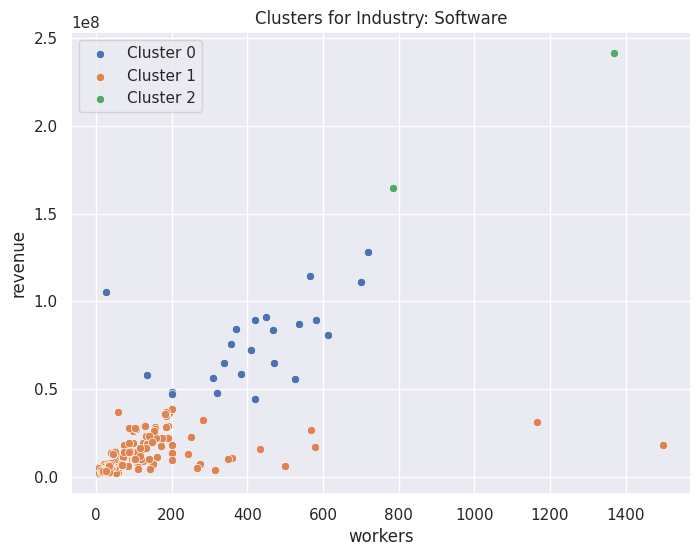

In [24]:
# Visualize the clusters for the specified industry
if df_industry is not None:
    plt.figure(figsize=(8, 6))

    for cluster in df_industry['cluster'].unique():
        cluster_data = df_industry[df_industry['cluster'] == cluster]
        sns.scatterplot(y=cluster_data['revenue'], x=cluster_data['workers'], label=f'Cluster {cluster}')

    plt.title(f'Clusters for Industry: {industry}')
    plt.legend()
    plt.show()

### By Identifying your company cluster see the insights of other successful companies which are similar to your company and make decisions accordingly about the number of workers and company location.